In [10]:
# Імпортуємо необхідні бібліотеки
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np




   Feature 1  Feature 2  Class
0   0.601034   1.535353      1
1   0.755945  -1.172352      0
2   1.354479  -0.948528      0
3   3.103090   0.233485      0
4   0.753178   0.787514      1

Точність класифікації: 0.9
Звіт про класифікацію:


Точність класифікації: 0.9
Точність (precision): 0.9222222222222223
Відгук (recall): 0.8645833333333334
F1-середнє: 0.89247311827957
AUC-ROC: 0.8986378205128206



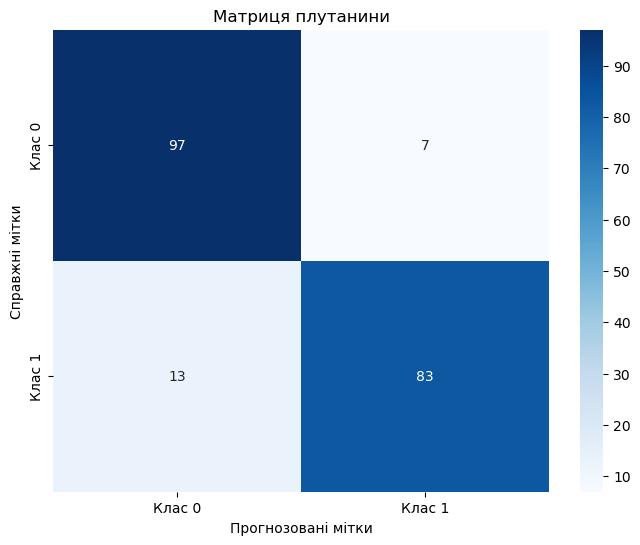

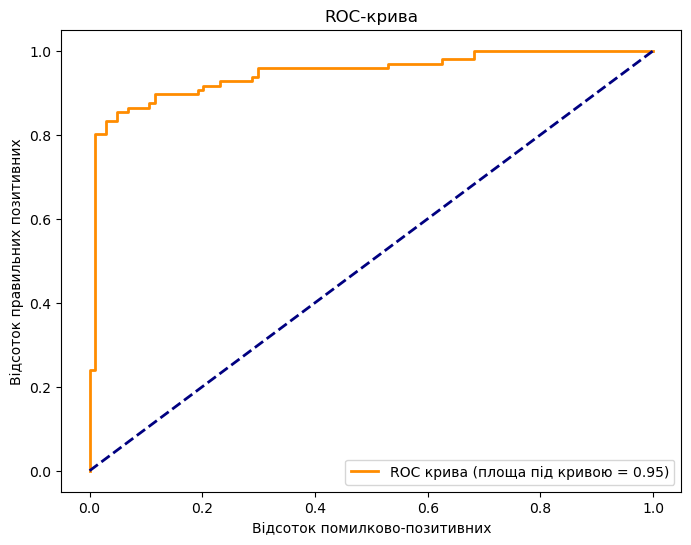

In [11]:
# Задаємо параметри для генерації даних
n_samples = 1000  # Загальна кількість прикладів
n_features = 2    # Кількість ознак
n_classes = 2     # Кількість класів

# Генеруємо набір даних
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=42)

# Створюємо DataFrame для зручності роботи з даними
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y

# Виводимо перші кілька рядків для перевірки
print(df.head())
print()

# Розділіть дані на навчальний та тестовий набори (наприклад, 80% для навчання та 20% для тестування)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Виведемо розміри навчальних та тестових наборів
# print("Розмір навчального набору:", X_train.shape)
# print("Розмір тестового набору:", X_test.shape)
# print()

# Створимо та навчимо логістичну регресію
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Зробимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінимо точність класифікації
accuracy = accuracy_score(y_test, y_pred)
print("Точність класифікації:", accuracy)

# Виведемо звіт про класифікацію
print("Звіт про класифікацію:\n")
print()

# Зробимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінимо різні метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Виведемо результати
print("Точність класифікації:", accuracy)
print("Точність (precision):", precision)
print("Відгук (recall):", recall)
print("F1-середнє:", f1)
print("AUC-ROC:", roc_auc)
print()

# Розраховуємо матрицю плутанини
cm = confusion_matrix(y_test, y_pred)

# Візуалізуємо матрицю плутанини за допомогою seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Клас 0', 'Клас 1'], yticklabels=['Клас 0', 'Клас 1'])
plt.xlabel('Прогнозовані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця плутанини')

# Візуалізуємо ROC-криву
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC крива (площа під кривою = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Відсоток помилково-позитивних')
plt.ylabel('Відсоток правильних позитивних')
plt.title('ROC-крива')
plt.legend(loc='lower right')
plt.show()

Логістична регресія:
Точність класифікації: 0.87
Відгук (recall): 0.87
F1-середнє: 0.8703114375521201


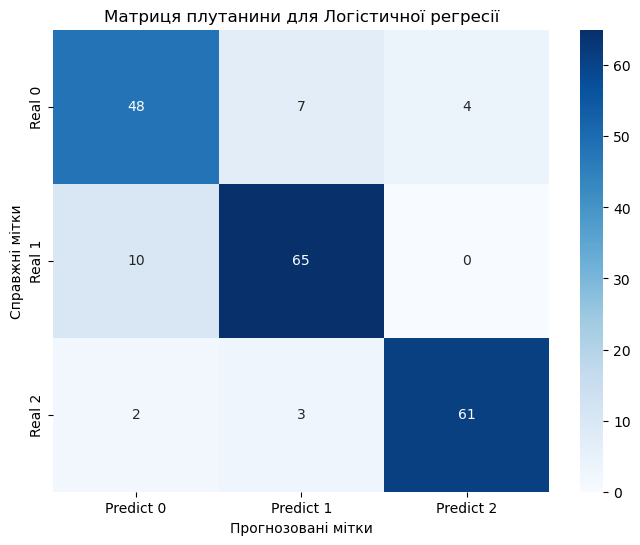

In [12]:
# Частина 2

# Задаємо параметри для генерації даних
n_samples = 1000  # Загальна кількість прикладів
n_features = 5  # Кількість ознак
n_classes = 3  # Кількість класів
n_clusters_per_class = 1  # Кількість кластерів для кожного класу

# Генеруємо набір даних
X, y = make_classification(
    n_samples=n_samples, n_features=n_features, n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class, random_state=42)

# Розділіть дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Створюємо DataFrame для зручності роботи з даними
df_multiclass = pd.DataFrame(
    X, columns=[f'Feature {i}' for i in range(1, n_features + 1)])
df_multiclass['Class'] = y

# Виводимо перші кілька рядків для перевірки
df_multiclass.head()


# Створюємо та навчаємо модель логістичної регресії
logreg_model = LogisticRegression(random_state=42, max_iter=500)
logreg_model.fit(X_train, y_train)


# Зробимо прогнози на тестовому наборі для логістичної регресії
y_pred_logreg = logreg_model.predict(X_test)

# Оцінимо різні метрики для логістичної регресії
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Виведемо результати
print("Логістична регресія:")
print("Точність класифікації:", accuracy_logreg)
print("Відгук (recall):", recall_logreg)
print("F1-середнє:", f1_logreg)


# Візуалізація матриці плутанини для логістичної регресії
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=[
            f'Predict {i}' for i in range(n_classes)], yticklabels=[f'Real {i}' for i in range(n_classes)])
plt.xlabel('Прогнозовані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця плутанини для Логістичної регресії')
plt.show()

In [13]:
import pandas as pd
import os
var = pd.read_csv("./salaries.csv")
var.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M


C:\Users\Windows10\AppData\Local\Temp\ipykernel_10272\3093517579.py:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())



MultiOutputClassifier efficiency evaluation for label 'experience_level':
Accuracy: 0.61
Recall: 0.61
F1-score: 0.59

MultiOutputClassifier efficiency evaluation for label 'employee_residence':
Accuracy: 0.96
Recall: 0.96
F1-score: 0.95

MultiOutputClassifier efficiency evaluation for label 'company_size':
Accuracy: 0.88
Recall: 0.88
F1-score: 0.87


c:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


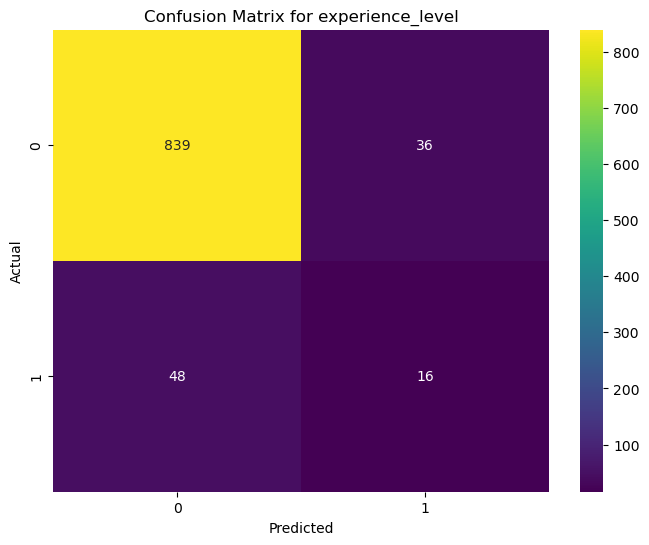

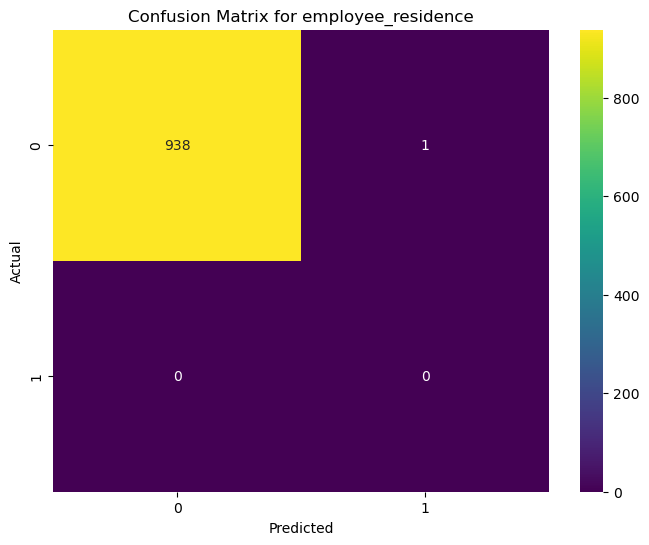

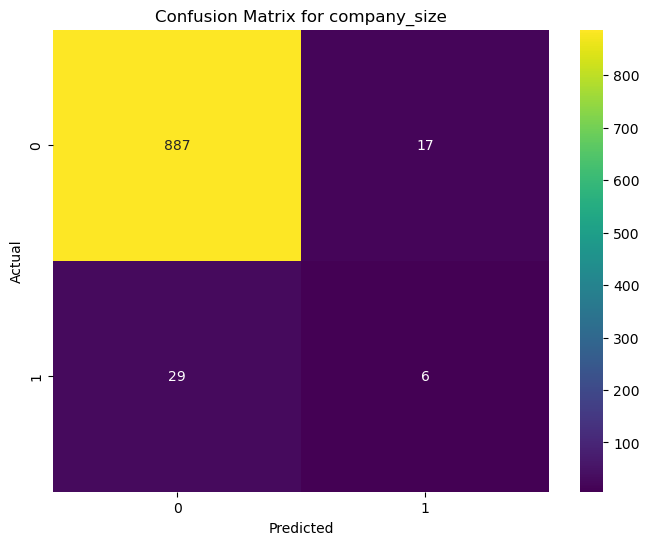

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


def remove_duplicates(df):
    df = df.drop_duplicates()
    return df


data = pd.read_csv("./salaries.csv")

data = remove_duplicates(data)

data = data.fillna(data.mean())

categorical_features = ['experience_level', 'employment_type', 'job_title',
                        'salary_currency', 'employee_residence', 'company_location', 'company_size']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

target = ['experience_level', 'employee_residence', 'company_size']
y = data[target]
predictors = [col for col in data.columns if col not in target]
X = data[predictors]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(
        y_test[label], y_pred[:, i], average='weighted')
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted')
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted')

    print(
        f"\nMultiOutputClassifier efficiency evaluation for label '{label}':")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

for i, target_col in enumerate(target):
    conf_matrix = multilabel_confusion_matrix(y_test[target_col], y_pred[:, i])
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {target_col}')
    plt.show()